**Big Data Analytics Final Project**

Nama Kelompok:
- Mawar Maharani - 2602178041
- Regina Patricia Hartawan - 2602098614

Nama UMKM: Coto HB'Eng

# **A. Preprocessing Data**

## Data Integration

In [ ]:
# Import library
import pandas as pd
import locale
from google.colab import files

In [ ]:
!sudo locale-gen id_ID.UTF-8
!sudo update-locale LANG=id_ID.UTF-8

Generating locales (this might take a while)...
  id_ID.UTF-8... done
Generation complete.


In [ ]:
# Memuat dataset
file_path = "transaksi_coto_hb'eng.csv"
data = pd.read_csv(file_path)

In [ ]:
# Melihat informasi awal dataset
print("Info Dataset:")
data.info()

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8194 entries, 0 to 8193
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Transaksi  8194 non-null   int64 
 1   Tanggal    8194 non-null   object
 2   Waktu      8194 non-null   object
 3   Menu       8194 non-null   object
 4   Harga      8194 non-null   object
 5   Jumlah     8194 non-null   int64 
 6   Total      8194 non-null   object
dtypes: int64(2), object(5)
memory usage: 448.2+ KB
Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8194 entries, 0 to 8193
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Transaksi  8194 non-null   int64 
 1   Tanggal    8194 non-null   object
 2   Waktu      8194 non-null   object
 3   Menu       8194 non-null   object
 4   Harga      8194 non-null   object
 5   Jumlah     8194 non-null   int64 
 6   Total      8194 non-null   object
dtypes

In [ ]:
# Melihat 5 data pertama
print("5 Data Pertama:")
print(data.head())

## **Data Reduction**

In [ ]:
# Cek jumlah kolom yang kosong
print("Jumlah nilai hilang per kolom:")
print(data.isnull().sum())

Jumlah nilai hilang per kolom:
Transaksi    0
Tanggal      0
Waktu        0
Menu         0
Harga        0
Jumlah       0
Total        0
dtype: int64


In [ ]:
# Cek duplikasi data
print("Jumlah duplikasi data:")
print(data.duplicated().sum())

Jumlah duplikasi data:
0


In [ ]:
# Menghapus duplikasi
data = data.drop_duplicates()
print("Jumlah data setelah menghapus duplikasi:", len(data))

Jumlah data setelah menghapus duplikasi: 8194


## **Data Transformations**

In [ ]:
# Konversi kolom Tanggal menjadi datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce', infer_datetime_format=True)

data['Tanggal'] = data['Tanggal'].dt.date

<ipython-input-8-2c58696015f2>:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce', infer_datetime_format=True)
<ipython-input-8-2c58696015f2>:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce', infer_datetime_format=True)


In [ ]:
# Membersihkan Rp pada kolom Harga dan Total
data['Harga'] = data['Harga'].astype(str).str.replace('Rp', '').str.replace('.', '').astype(int)
data['Total'] = data['Total'].astype(str).str.replace('Rp', '').str.replace('.', '').astype(int)

In [ ]:
# Konversi kolom Waktu menjadi format waktu
data['Waktu'] = pd.to_datetime(data['Waktu'], format='%I:%M:%S %p').dt.strftime('%H:%M:%S')

### **Membuat Fitur Baru**

In [ ]:
# Membuat nama hari dalam bahasa Indonesia secara manual
hari_mapping = {
    'Monday': 'Senin', 'Tuesday': 'Selasa', 'Wednesday': 'Rabu',
    'Thursday': 'Kamis', 'Friday': 'Jumat', 'Saturday': 'Sabtu',
    'Sunday': 'Minggu'
}

# Membuat kolom baru
data['Nama Hari'] = data['Tanggal'].apply(lambda date: hari_mapping.get(date.strftime('%A'), '') if pd.notna(date) else '')

In [ ]:
# Membuat kolom jam dari kolom Waktu
data['Waktu'] = data['Waktu'].str.strip()
# Convert to datetime using the appropriate format, handling potential AM/PM
data['Jam'] = pd.to_datetime(data['Waktu'], format='%H:%M:%S', errors='coerce').dt.hour

In [ ]:
# Membuat kategori waktu (pagi, siang, malam)
def kategori_waktu(jam):
    if 5 <= jam < 12:
        return 'Pagi'
    elif 12 <= jam < 18:
        return 'Siang'
    else:
        return 'Malam'

data['Kategori Waktu'] = data['Jam'].apply(kategori_waktu)

In [ ]:
# Menyimpan dataset hasil preprocessing
data.to_csv('final_coto_hbeng.csv', index=False)
print("Dataset yang sudah diproses berhasil disimpan sebagai 'final_coto_hbeng.csv'.")

files.download('final_coto_hbeng.csv')

Dataset yang sudah diproses berhasil disimpan sebagai 'dataset_preprocessed.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# B. Machine Learning Algorithms & Data Analysis

## 1) Daily Menu Analysis

In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
file_path = '/content/final_coto_hbeng.csv'
data = pd.read_csv(file_path)

In [ ]:
# Pastikan kolom tanggal dalam format datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce')

In [ ]:
# Analisis menu harian
menu_harian = data.groupby(['Tanggal', 'Menu'])['Jumlah'].sum().reset_index()

In [ ]:
# Menentukan menu paling populer per hari
menu_populer_harian = menu_harian.loc[menu_harian.groupby('Tanggal')['Jumlah'].idxmax()]
print("Menu Paling Populer Harian:")
print(menu_populer_harian)

Menu Paling Populer Harian:
       Tanggal               Menu  Jumlah
7   2024-10-21           Es Jeruk      29
46  2024-10-22  Rahang Tuna Bakar      34
67  2024-10-23            Ketupat      35
92  2024-10-24            Ketupat      35
101 2024-10-25        Ayam Geprek      35
142 2024-10-26            Ketupat      32
167 2024-10-27            Ketupat      35
192 2024-10-28            Ketupat      52
217 2024-10-29            Ketupat      37
233 2024-10-30             Es Teh      36
264 2024-10-31         Jus Mangga      33
282 2024-11-13           Es Jeruk      38
317 2024-11-14            Ketupat      40
336 2024-11-15        Jeruk Panas      29
367 2024-11-16            Ketupat      31
392 2024-11-17            Ketupat      43
417 2024-11-18            Ketupat      41
438 2024-11-19      Jus Buah Naga      33


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:895: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(self.convert_yunits(self._y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:895: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(self.convert_yunits(s

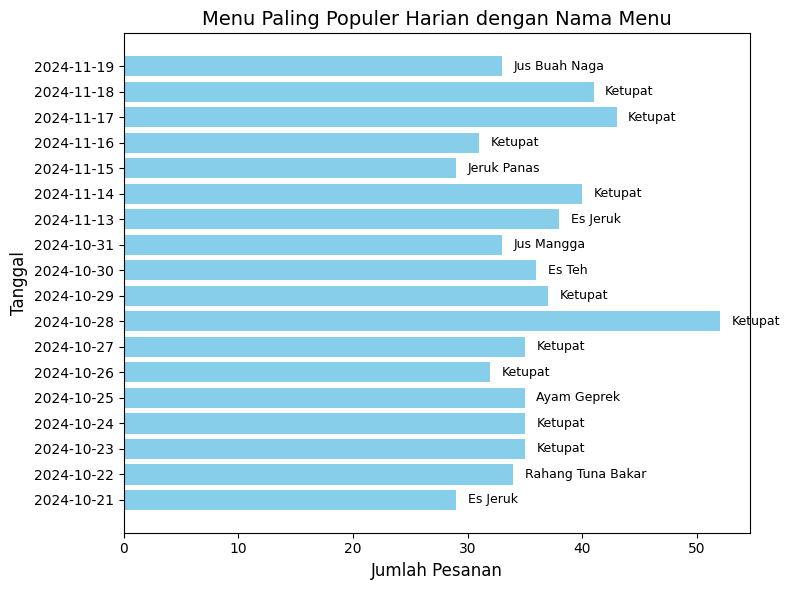

In [88]:
# Visualisasi menu paling populer per hari dengan label nama menu (horizontal)
plt.figure(figsize=(8, 6))  # Atur ukuran grafik
plt.barh(menu_populer_harian['Tanggal'].astype(str), menu_populer_harian['Jumlah'], color='skyblue')

# Menambahkan label menu pada setiap batang
for i, row in menu_populer_harian.iterrows():
    plt.text(row['Jumlah'] + 1, row['Tanggal'].strftime('%Y-%m-%d'), row['Menu'],
             ha='left', va='center', fontsize=9)

# Mengatur tampilan grafik
plt.yticks(fontsize=10)
plt.ylabel('Tanggal', fontsize=12)
plt.xlabel('Jumlah Pesanan', fontsize=12)
plt.title('Menu Paling Populer Harian dengan Nama Menu', fontsize=14)
plt.tight_layout()
plt.show()

## 2) Predict Future Sales

In [ ]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
file_path = '/content/final_coto_hbeng.csv'
data = pd.read_csv(file_path)

In [ ]:
# Pastikan kolom tanggal dalam format datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce')

In [ ]:
# Data untuk prediksi (agregasi jumlah pesanan harian untuk setiap menu)
sales_data = data.groupby(['Tanggal', 'Menu'])['Jumlah'].sum().reset_index()

In [ ]:
# Buat fitur tanggal menjadi numerik (untuk regresi)
sales_data['Tanggal_numeric'] = (sales_data['Tanggal'] - sales_data['Tanggal'].min()).dt.days

In [ ]:
# Pisahkan data untuk model
X = sales_data[['Tanggal_numeric']]
y = sales_data['Jumlah']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [ ]:
# Model Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [ ]:
# Evaluasi model
lr_mae = mean_absolute_error(y_test, lr_predictions)
print(f"Linear Regression MAE: {lr_mae}")

Linear Regression MAE: 5.5331837330407385


In [ ]:
# Prediksi ke depan (misalnya 7 hari berikutnya)
future_days = pd.DataFrame({'Tanggal_numeric': range(X['Tanggal_numeric'].max() + 1, X['Tanggal_numeric'].max() + 8)})
future_lr = lr_model.predict(future_days)

In [ ]:
# Tampilkan prediksi
future_dates = pd.date_range(start=sales_data['Tanggal'].max() + pd.Timedelta(days=1), periods=7)
predictions = pd.DataFrame({
    'Tanggal': future_dates,
    'Linear_Regression': future_lr,
})
print("Prediksi Penjualan Masa Depan:")
print(predictions)

Prediksi Penjualan Masa Depan:
     Tanggal  Linear_Regression
0 2024-11-20          19.555660
1 2024-11-21          19.549605
2 2024-11-22          19.543549
3 2024-11-23          19.537494
4 2024-11-24          19.531438
5 2024-11-25          19.525383
6 2024-11-26          19.519327


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


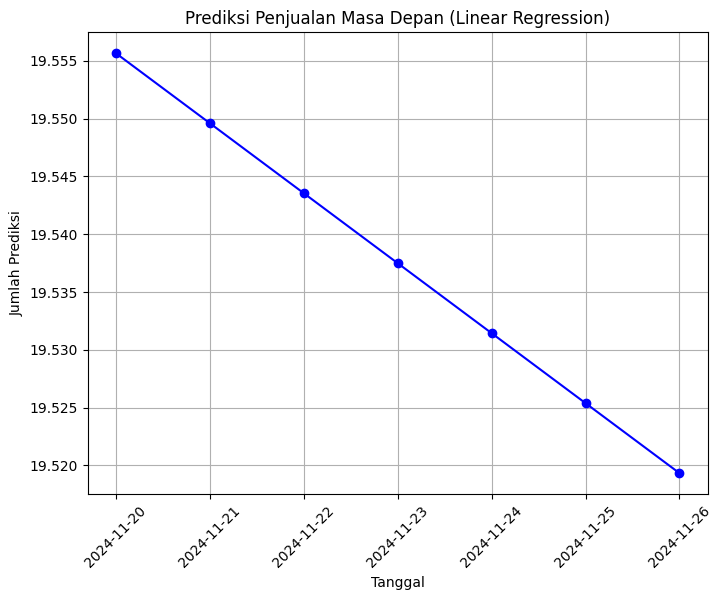

In [83]:
# Visualisasi prediksi Linear Regression
plt.figure(figsize=(8, 6))
plt.plot(future_dates, future_lr, label='Linear Regression', marker='o', color='blue')
plt.xticks(rotation=45)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Prediksi')
plt.title('Prediksi Penjualan Masa Depan (Linear Regression)')
plt.grid()
plt.show()

### Random Forest

In [ ]:
# Model Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Evaluasi model
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f"Random Forest MAE: {rf_mae}")

Random Forest MAE: 5.697127749954569


In [ ]:
# Prediksi ke depan (misalnya 7 hari berikutnya)
future_days = pd.DataFrame({'Tanggal_numeric': range(X['Tanggal_numeric'].max() + 1, X['Tanggal_numeric'].max() + 8)})
future_rf = rf_model.predict(future_days)

In [ ]:
# Tampilkan prediksi
future_dates = pd.date_range(start=sales_data['Tanggal'].max() + pd.Timedelta(days=1), periods=7)
predictions = pd.DataFrame({
    'Tanggal': future_dates,
    'Random_Forest': future_rf
})
print("Prediksi Penjualan Masa Depan:")
print(predictions)

Prediksi Penjualan Masa Depan:
     Tanggal  Random_Forest
0 2024-11-20      18.980965
1 2024-11-21      18.980965
2 2024-11-22      18.980965
3 2024-11-23      18.980965
4 2024-11-24      18.980965
5 2024-11-25      18.980965
6 2024-11-26      18.980965


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


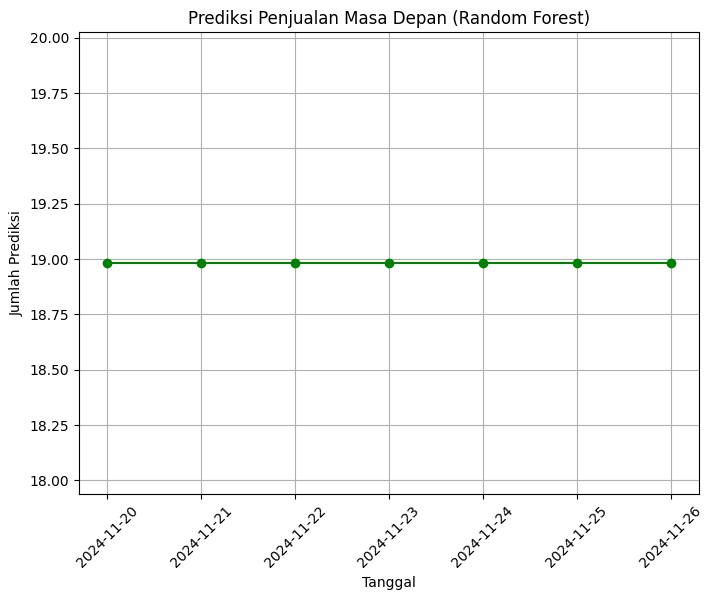

In [82]:
# Visualisasi prediksi Random Forest
plt.figure(figsize=(8, 6))
plt.plot(future_dates, future_rf, label='Random Forest', marker='o', color='green')
plt.xticks(rotation=45)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Prediksi')
plt.title('Prediksi Penjualan Masa Depan (Random Forest)')
plt.grid()
plt.show()

## 3) Peak Hour Analysis

In [ ]:
# Menghitung jumlah transaksi untuk setiap kategori waktu
peak_hour = data.groupby('Kategori Waktu')['Transaksi'].count().reset_index()

In [ ]:
# Mengurutkan kategori berdasarkan jumlah transaksi
peak_hour = peak_hour.sort_values(by='Transaksi', ascending=False)

In [ ]:
# Menampilkan hasil
print("Waktu paling ramai berdasarkan jumlah transaksi:")
print(peak_hour)

Waktu paling ramai berdasarkan jumlah transaksi:
  Kategori Waktu  Transaksi
2          Siang       4490
1           Pagi       2441
0          Malam       1263


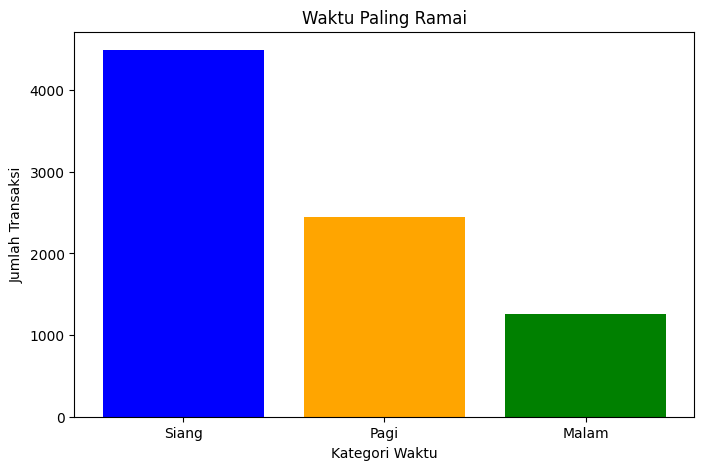

In [ ]:
# Visualisasi
plt.figure(figsize=(8, 5))
plt.bar(peak_hour['Kategori Waktu'], peak_hour['Transaksi'], color=['blue', 'orange', 'green'])
plt.xlabel('Kategori Waktu')
plt.ylabel('Jumlah Transaksi')
plt.title('Waktu Paling Ramai')
plt.show()

## 4) Identifying Frequent Menu Set

In [ ]:
# Import libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [ ]:
# Mengelompokkan item pada tiap transaksi ke dalam satu list menu
grouped_data = data.groupby('Transaksi')['Menu'].apply(list).reset_index()

# Tampilkan beberapa data untuk mengecek perubahan struktur data
grouped_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaksi,Menu
0,1,"[Ayam Bakar, Dada Tuna Bakar, Kacang Goreng, N..."
1,2,"[Sop Konro, Sop Kikil, Jus Mangga, Es Jeruk]"
2,3,"[Ikan Goreng Tepung, Es Jeruk]"
3,4,"[Ayam Geprek, Kerupuk, Teh Panas]"
4,5,"[Rahang Tuna Bakar, Nasi Putih, Jus Buah Naga]"


In [ ]:
# Encode transaksi ke dalam format one-hot encoding
te = TransactionEncoder()
te_data = te.fit_transform(grouped_data['Menu'])
df_encoded = pd.DataFrame(te_data, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Menerapkan algoritma Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.08, use_colnames=True)
frequent_itemsets.sort_values(by="support", ascending=False, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Filter agar tiap set hanya terdiri dari 2 item
frequent_itemsets_2 = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)]
top_5_itemsets = frequent_itemsets_2.nlargest(5, 'support')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mengecek hasil set
print("Top 5 set menu:")
print(top_5_itemsets)

Top 5 set menu:
     support                  itemsets
25  0.166259  (Coto Makassar, Ketupat)
28  0.092298    (Jeruk Panas, Ketupat)
26  0.088631       (Es Jeruk, Ketupat)
27  0.088020         (Es Teh, Ketupat)
31  0.081296     (Jus Mangga, Ketupat)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Menyiapkan data untuk visualisasi
itemset_labels = [' & '.join(list(itemset)) for itemset in top_5_itemsets['itemsets']]
support_values = top_5_itemsets['support'] * len(grouped_data)  # Convert support to count

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


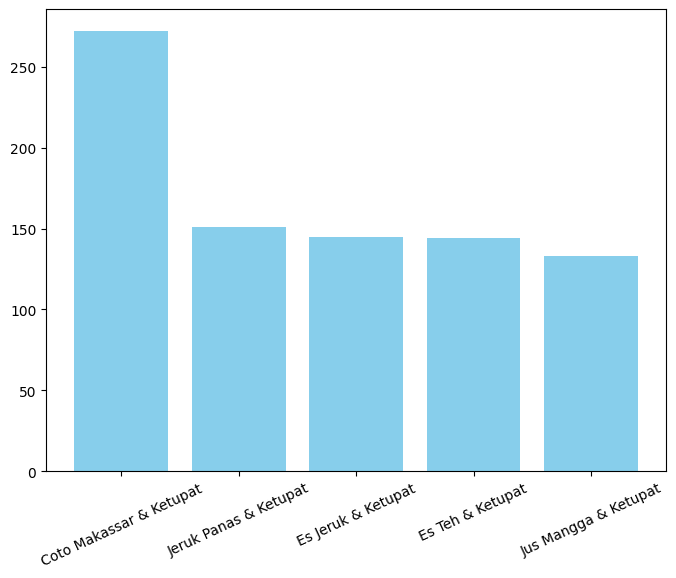

In [80]:
# Plot data
plt.figure(figsize=(8, 6))
plt.xticks(rotation=25)
bars = plt.bar(itemset_labels, support_values, color='skyblue')

In [ ]:
num_itemsets = len(frequent_itemsets)

# Generate association rules dengan num_itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=num_itemsets)

# Menampilkan 5 aturan teratas berdasarkan nilai lift
rules.sort_values(by="lift", ascending=False, inplace=True)
print("Top 5 Association Rules:")
print(rules.head())

# Memilih subset rules dengan lift, confidence, atau support tertentu
filtered_rules = rules[(rules['confidence'] > 0.5) & (rules['lift'] > 1.2)]
print("\nFiltered Rules:")
print(filtered_rules)

Top 5 Association Rules:
       antecedents      consequents  antecedent support  consequent support  \
0  (Coto Makassar)        (Ketupat)            0.166259            0.302567   
1        (Ketupat)  (Coto Makassar)            0.302567            0.166259   
2    (Jeruk Panas)        (Ketupat)            0.270782            0.302567   
3        (Ketupat)    (Jeruk Panas)            0.302567            0.270782   
7        (Ketupat)         (Es Teh)            0.302567            0.259169   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.166259    1.000000  3.305051               1.0  0.115955         inf   
1  0.166259    0.549495  3.305051               1.0  0.115955    1.850680   
2  0.092298    0.340858  1.126552               1.0  0.010368    1.058091   
3  0.092298    0.305051  1.126552               1.0  0.010368    1.049310   
7  0.088020    0.290909  1.122470               1.0  0.009604    1.044762   

   zhangs_metric   jaccard  certainty

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


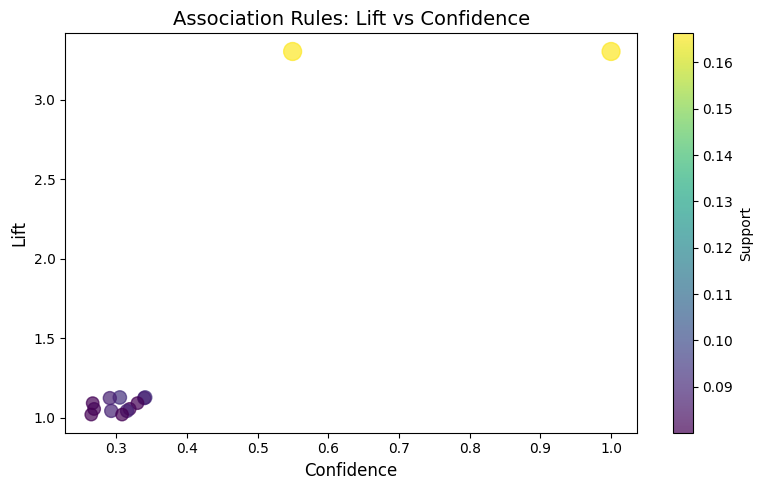

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi Lift vs Confidence
plt.figure(figsize=(8, 5))
plt.scatter(rules['confidence'], rules['lift'], c=rules['support'], cmap='viridis', s=rules['support']*1000, alpha=0.7)
plt.colorbar(label='Support')
plt.title('Association Rules: Lift vs Confidence', fontsize=14)
plt.xlabel('Confidence', fontsize=12)
plt.ylabel('Lift', fontsize=12)
plt.tight_layout()
plt.show()

## 5) Total Daily Sales

In [ ]:
import matplotlib.ticker as mticker

# Pastikan kolom Total sudah dalam format numerik
data['Total'] = pd.to_numeric(data['Total'], errors='coerce')

# Menghitung total penjualan harian
total_daily_sales = data.groupby('Tanggal')['Total'].sum().reset_index()

# Mengganti nama kolom untuk lebih jelas
total_daily_sales.columns = ['Tanggal', 'Total Penjualan']

# Menampilkan hasil
print("Total penjualan harian:")
print(total_daily_sales)

Total penjualan harian:
      Tanggal  Total Penjualan
0  2024-10-21         10464000
1  2024-10-22         13785000
2  2024-10-23         11710000
3  2024-10-24         10230000
4  2024-10-25         12513000
5  2024-10-26         12485000
6  2024-10-27         12441000
7  2024-10-28         12923000
8  2024-10-29         11602000
9  2024-10-30         12632000
10 2024-10-31         12824000
11 2024-11-13         11639000
12 2024-11-14         11818000
13 2024-11-15         10331000
14 2024-11-16         12095000
15 2024-11-17         12818000
16 2024-11-18         12424000
17 2024-11-19         11035000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


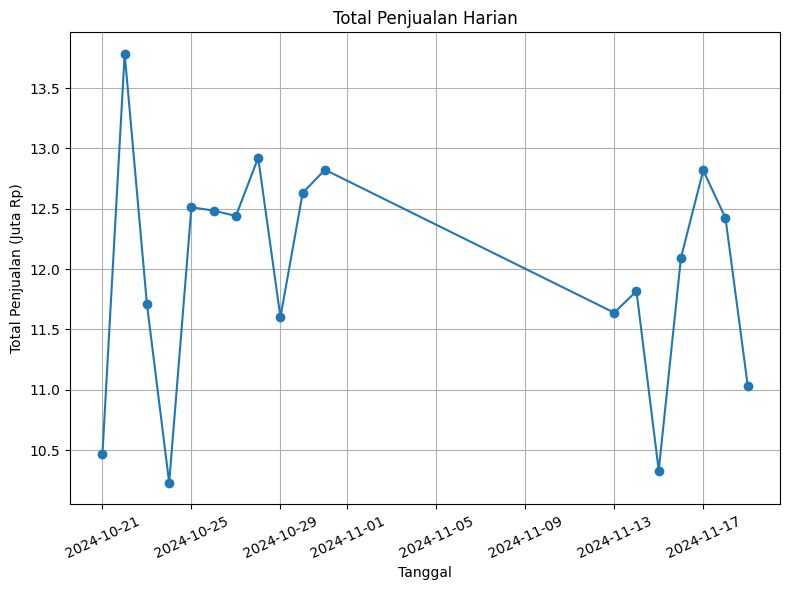

In [81]:
# Visualisasi total penjualan harian
plt.figure(figsize=(8, 6))
plt.plot(total_daily_sales['Tanggal'], total_daily_sales['Total Penjualan'], marker='o', linestyle='-')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan (Juta Rp)')
plt.title('Total Penjualan Harian')
plt.xticks(rotation=25)

# Ubah skala menjadi jutaan
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}'))

plt.grid(True)
plt.tight_layout()
plt.show()